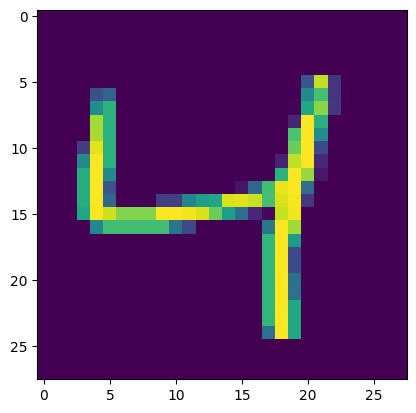

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random


f = open('/content/train-images.idx3-ubyte','rb')

image_size = 28
num_images = 5

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

image = np.asarray(data[2]).squeeze()
plt.imshow(image)
plt.show()

In [45]:
class Network(object):

    def __init__(self, sizes):

      self.size = sizes # number of neurons per layer
      self.num_layer = len(sizes) # number of layers

      # assigns a random bias to each neuron in a layer not including the initial layer
      self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
      # assigns a random weight to each neuron
      self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    # normalizes values between 0 and 1
    def sigmoid(z):
      return 1.0/(1.0+np.exp(-z))

    # applies the equation sigmoid(wa + b) to every layer
    def feedforward(self, a):
          for b, w in zip(self.biases, self.weights):
              a = sigmoid(np.dot(w, a)+b)
          return a

    # implements stochastic gradient descent
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):

      if test_data:
        n_test = len(test_data)
      n = len(training_data)

      for j in range(epochs): # executes for as many epochs specified
        random.shuffle(training_data)

        # creates a list of the mini batches from the training data
        mini_batchs =[
            training_data[k:k + mini_batch_size]
            for k in range(0, n, mini_batch_size)]

        for mini_batch in mini_batchs:
          self.update_mini_batch(mini_batch, eta)
        if test_data:
                  print.format(
                      j, self.evaluate(test_data), n_test) # "Epoch {0}: {1} / {2}"
        else:
            print.format(j) # "Epoch {0} complete"


    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)


In [ ]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

In [ ]:
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
def cost_function(expectedNum, actualNum):
    difference = expectedNum - actualNum
    cost = sum(difference ** 2)

    return difference, cost

In [ ]:
def train_one_iteration(model_inputs, last_cost:float):

      if cost >= last_cost:
          return False, cost
      else:
          model.slope += slope_update
          model.intercept += intercept_update
          return True, cost

In [ ]:
def training_loop():
    print("Training beginning...")
    last_cost = math.inf
    continue_loop = True
    while continue_loop:
        continue_loop, last_cost = train_one_iteration(model_inputs = data[""],
                                                    expectedNum = data[""],
                                                    last_cost = last_cost)

    print("Training complete.")